In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

## 1. Understanding the data

In [310]:
#Lets read the data using pandas
warnings.filterwarnings("ignore")
data = pd.read_csv("loan/loan.csv")
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


First let's check the shape of the dataset, also some information such as datatypes and the general statistical information

In [311]:
print("Shape of the dataset : {}".format(data.shape))

Shape of the dataset : (39717, 111)


In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [313]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Observation : We see that dataset has 39717 rows and 111 columns. The dataset is comprised of int, float and object dtypes.

## 2. Data Cleaning

Now lets check if there are missing values in the data and identify the columns that have missing values.

In [314]:
data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [315]:
#Lets check the number of columns that have a lot of missing values
data.isnull().all(axis=0).sum()

54

In [316]:
data.dropna(axis=1, how='all', inplace=True)

In [317]:
data.shape

(39717, 57)

In [318]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

### Observation: After dropping the missing values we have 42 columns and 39717 rows in the dataset. Now, looking at the above columns we see certain variables like 'id', 'member_id', 'zip_code', 'url', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',' total_rec_int', 'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','application_type' are the customer behavior variables and are not available at the time of the loan application and hence they might not be helpful for our analysis. So lets remove these varibales.

In [319]:
data.drop(['id','member_id','member_id','zip_code','title','emp_title','url','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','application_type','acc_now_delinq','chargeoff_within_12_mths','mths_since_last_delinq','mths_since_last_record','last_pymnt_d','delinq_amnt','tax_liens','pub_rec_bankruptcies'], axis=1, inplace=True)

In [320]:
data.shape

(39717, 21)

### We can also exclude the data for the current loans as it might not be relevant for our analysis. Since our goal is to analyse the factors that impact the loan defaulting, we might want to consider only the 'Fully Paid' and  'Charged Off' loan statuses

In [321]:
data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [322]:
data = data[data.loan_status!="Current"]

In [323]:
data.shape

(38577, 21)

In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
loan_amnt              38577 non-null int64
funded_amnt            38577 non-null int64
funded_amnt_inv        38577 non-null float64
term                   38577 non-null object
int_rate               38577 non-null object
installment            38577 non-null float64
grade                  38577 non-null object
sub_grade              38577 non-null object
emp_length             37544 non-null object
home_ownership         38577 non-null object
annual_inc             38577 non-null float64
verification_status    38577 non-null object
issue_d                38577 non-null object
loan_status            38577 non-null object
pymnt_plan             38577 non-null object
desc                   26050 non-null object
purpose                38577 non-null object
addr_state             38577 non-null object
dti                    38577 non-null float64
total_acc              38577 non-n

### Lets check the unique values of some of the categorical data

In [211]:
#Unique values for the column term
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [212]:
#Unique values for the column grade
data.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [213]:
#Unique values for the column sub_grade
data.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [214]:
#Unique values for the column emp_length
data.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [215]:
#Unique values for the column home_ownership
data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [216]:
#Unique values for the column verification_status
data.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [217]:
#Unique values for the column pymnt_plan
data.pymnt_plan.unique()

array(['n'], dtype=object)

In [218]:
#Unique values for the column purpose
data.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [219]:
#Unique values for the column policy_code
data.policy_code.unique()

array([1], dtype=int64)

In [220]:
#Unique values for the column desc
data.desc.unique()

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       'Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.',
       'The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuing

### Observation:  We see that payment plan and policy_code has only one value and hence can be removed and also the column desc might not help in our analysis and can be removed.

In [325]:
data.drop(['pymnt_plan'], axis=1, inplace=True)

In [326]:
data.drop(['policy_code'], axis=1, inplace=True)

In [327]:
data.drop(['desc'], axis=1, inplace=True)

In [328]:
data.shape

(38577, 18)

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
loan_amnt              38577 non-null int64
funded_amnt            38577 non-null int64
funded_amnt_inv        38577 non-null float64
term                   38577 non-null object
int_rate               38577 non-null object
installment            38577 non-null float64
grade                  38577 non-null object
sub_grade              38577 non-null object
emp_length             37544 non-null object
home_ownership         38577 non-null object
annual_inc             38577 non-null float64
verification_status    38577 non-null object
issue_d                38577 non-null object
loan_status            38577 non-null object
purpose                38577 non-null object
addr_state             38577 non-null object
dti                    38577 non-null float64
total_acc              38577 non-null int64
dtypes: float64(4), int64(3), object(11)
memory usage: 5.6+ MB


### Observation: From the above output we see that emp_length, pub_rec_bankruptcies columns have missing values. Lets analyse the mean/mode/median for these columns.

In [329]:
#Analyse emp_length column. Since emp_length is categorical data lest check the mode.
print("The mode of emp_length column is "+data.emp_length.mode()[0])


#This implies that majority of the customers in our dataset have 10+ years of experience and missing values 
#in this column can be imputed with the mode.
data['emp_length'].fillna(data.emp_length.mode()[0], inplace=True)

The mode of emp_length column is 10+ years


In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
loan_amnt              38577 non-null int64
funded_amnt            38577 non-null int64
funded_amnt_inv        38577 non-null float64
term                   38577 non-null object
int_rate               38577 non-null object
installment            38577 non-null float64
grade                  38577 non-null object
sub_grade              38577 non-null object
emp_length             38577 non-null object
home_ownership         38577 non-null object
annual_inc             38577 non-null float64
verification_status    38577 non-null object
issue_d                38577 non-null object
loan_status            38577 non-null object
purpose                38577 non-null object
addr_state             38577 non-null object
dti                    38577 non-null float64
total_acc              38577 non-null int64
dtypes: float64(4), int64(3), object(11)
memory usage: 5.6+ MB


## 3. Data Analysis

In [229]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,total_acc
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,9
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,4
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,10
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,37
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,12


### 3a. Univariate Analysis 

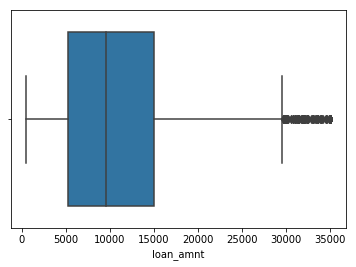

In [330]:
#Lets analyse loan_amnt column and check for outliers
sns.boxplot(data['loan_amnt'])

In [331]:
percentiles = data.loan_amnt.quantile([0.25,0.5, 0.75,0.90, 0.95])
percentiles

0.25     5300.0
0.50     9600.0
0.75    15000.0
0.90    21600.0
0.95    25000.0
Name: loan_amnt, dtype: float64

In [332]:
#Lets find the IQR(q3-q1)
q3 = 15000.0
q1 = 5300.0
iqr = q3 - q1
print("IQR : "+str(iqr))

#Lets check the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print("Lower Bound : "+str(lower_bound))
print("Upper Bound : "+str(upper_bound))

IQR : 9700.0
Lower Bound : -9250.0
Upper Bound : 29550.0


In [259]:
# Outlier treatment : All values greater that the upper bound are outliers and can be capped.
data=data[data['loan_amnt']<upper_bound]

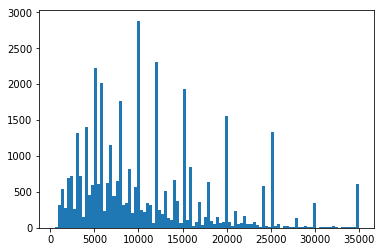

In [333]:
plt.hist(data['loan_amnt'], bins=100)
plt.show()

### Observation: We see that majority of the loan amount is distributed between 500 and 15000. We also saw that there were outliers which had to be capped to the upper bound.

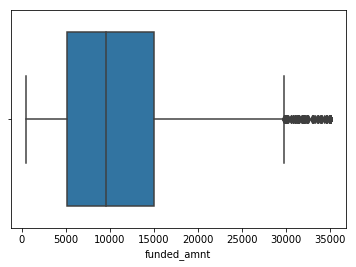

In [334]:
#Lets analyse funded_amnt column and check for outliers
sns.boxplot(data['funded_amnt'])

In [335]:
percentiles_funded_amnt = data.funded_amnt.quantile([0.25,0.5, 0.75,0.90, 0.95])
percentiles_funded_amnt

0.25     5200.0
0.50     9550.0
0.75    15000.0
0.90    20000.0
0.95    25000.0
Name: funded_amnt, dtype: float64

In [336]:
#Lets find the IQR(q3-q1)
q3 = 14050.0
q1 = 5000.0
iqr = q3 - q1
print("IQR : "+str(iqr))

#Lets check the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print("Lower Bound : "+str(lower_bound))
print("Upper Bound : "+str(upper_bound))

IQR : 9050.0
Lower Bound : -8575.0
Upper Bound : 27625.0


In [337]:
# Outlier treatment : All values greater that the upper bound are outliers and can be capped.
data=data[data['funded_amnt']<upper_bound]

### Observation: We see that majority of the funded amount is distributed between 5000 and 15000. We also saw that there were outliers which had to be capped to the upper bound.¶

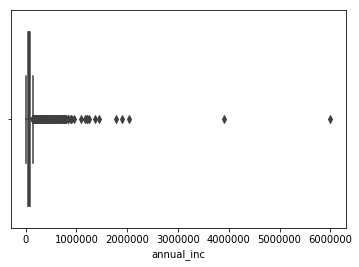

In [338]:
#Lets analyse the annual_inc column
sns.boxplot(data['annual_inc'])

In [339]:
percentiles_annual_inc = data.annual_inc.quantile([0.25,0.5, 0.75,0.90, 0.95])
percentiles_annual_inc

0.25     40000.0
0.50     57120.0
0.75     80000.0
0.90    110499.2
0.95    136124.4
Name: annual_inc, dtype: float64

In [340]:
#Lets find the IQR(q3-q1)
q3 = 80000.0
q1 = 40000.0
iqr = q3 - q1
print("IQR : "+str(iqr))

#Lets check the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print("Lower Bound : "+str(lower_bound))
print("Upper Bound : "+str(upper_bound))

IQR : 40000.0
Lower Bound : -20000.0
Upper Bound : 140000.0


In [341]:
# Outlier treatment : All values greater that the upper bound are outliers and can be capped.
data=data[data['annual_inc']<upper_bound]

### Observation: We see that the annual income is distributed unsually and there are outliers. After capping the outliers to the upped bound we see the below plot.

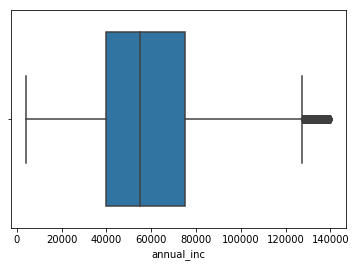

In [342]:
sns.boxplot(data['annual_inc'])

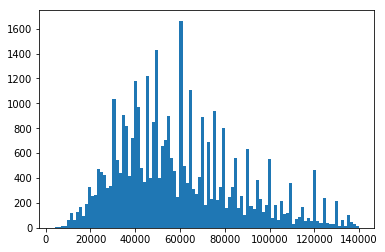

In [345]:
plt.hist(data['annual_inc'], bins=100)
plt.show()

### Observation: Majority of the annual income is distributed between 20000 and 90000

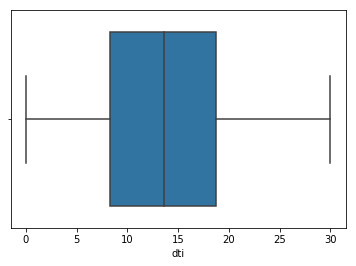

In [343]:
#Lets analyse the dti column
sns.boxplot(data['dti'])

### Observation: Since there are no outliers we'll leave the dti column as is

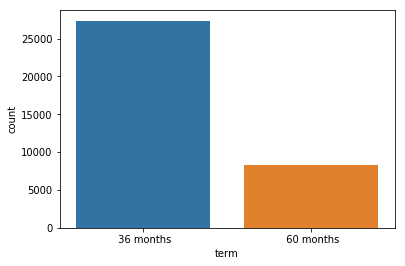

In [348]:
#Lets analyse the term column
sns.countplot(x = 'term', data = data)

### Observation: Majority of the customers in the dataset have the number of payments on the loan as 36 months.

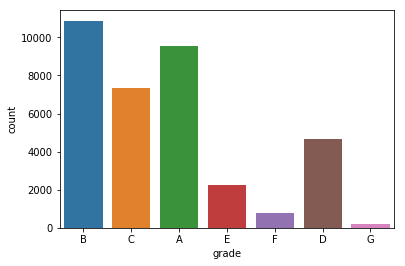

In [349]:
#Lets analyse the grade column
sns.countplot(x = 'grade', data = data)

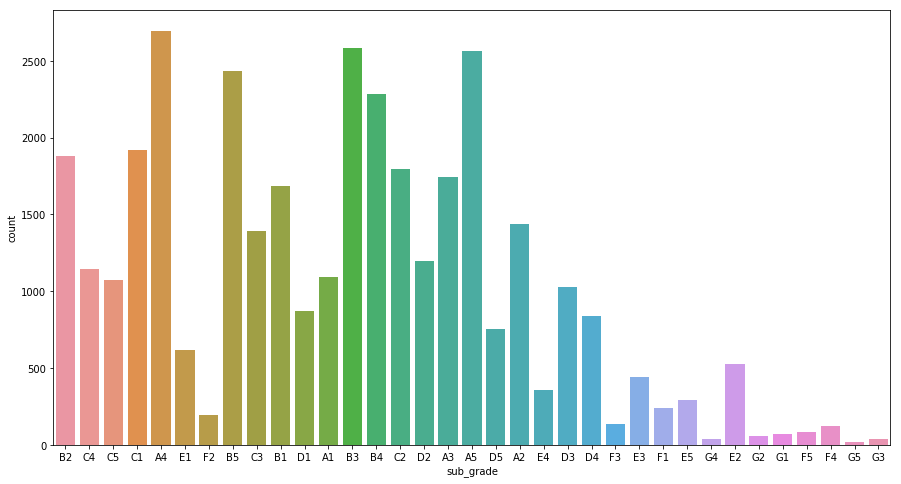

In [354]:
#Lets analyse the sub_grade column
plt.figure(figsize=(15,8))
sns.countplot(x = 'sub_grade', data = data)

### Observation: Majority of the customers are from A and B loan grades. Specifically A4, A5, B3, B4, B5

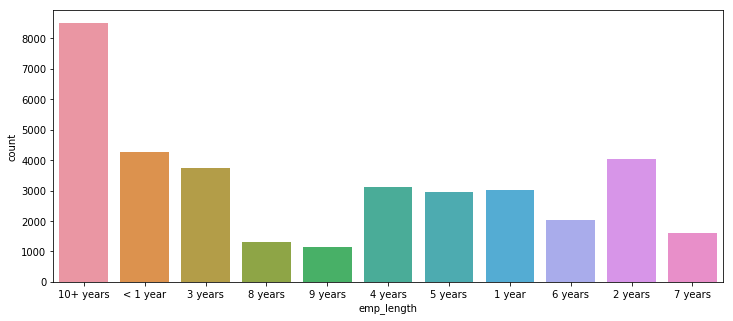

In [364]:
#Lets analyse the emp_length column
plt.figure(figsize=(12,5))
sns.countplot(x = 'emp_length', data = data)

### Observation: Most customers ahve 10+ years of experience

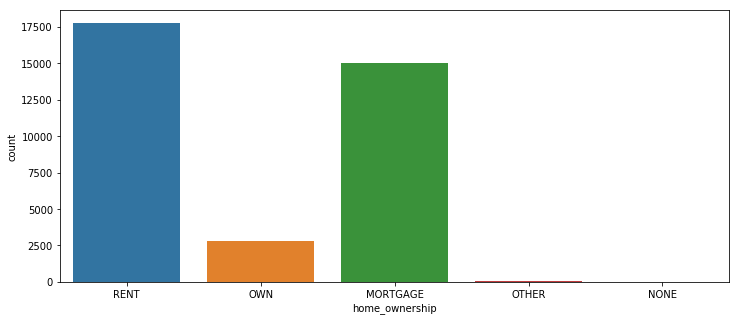

In [365]:
#Lets analyse the home_ownership column
plt.figure(figsize=(12,5))
sns.countplot(x = 'home_ownership', data = data)

### Observation: Majority of the customers are either living in a rented house or have mortgage on thier homes.

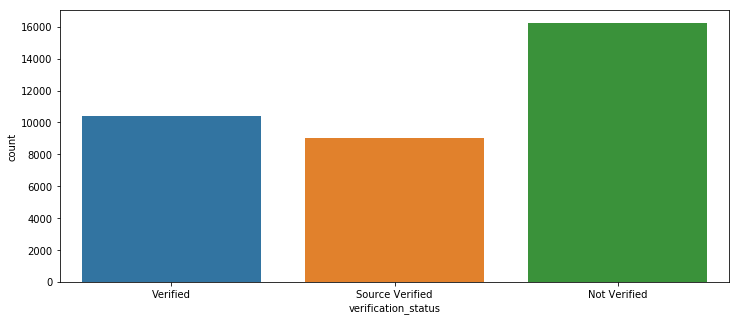

In [366]:
#Lets analyse the verification_status column
plt.figure(figsize=(12,5))
sns.countplot(x = 'verification_status', data = data)

### Observation: Majority of the customers' incomes were not verified by LC

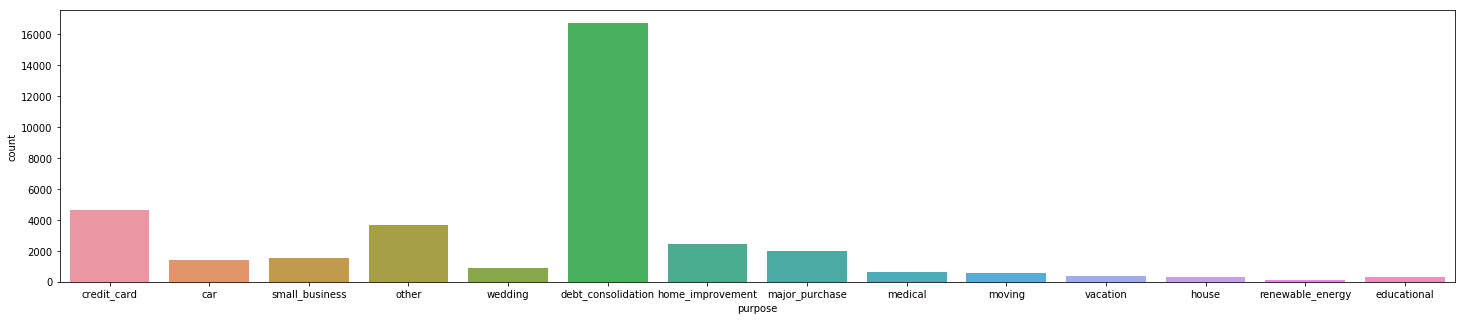

In [370]:
#Lets analyse the purpose column
plt.figure(figsize=(25,5))
sns.countplot(x = 'purpose', data = data)

### Observation: Majority of the customers ahve taken loan for debt consolidation and loans taken for medical, moving, vacation,house, renewable energy and educational purposes are the least

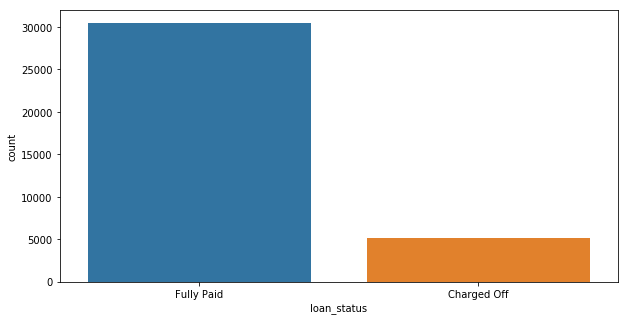

In [372]:
#Lets analyse the loan_status column
plt.figure(figsize=(10,5))
sns.countplot(x = 'loan_status', data = data)

### Observation: Majority of the customers have fully paid the loan 

### 3b. Analyse the impact of various attributes on loan_status

In [401]:
#Lets analyse the impact of loan_amnt on the loan status
#Lets create buckets for loan_amnt
data['loan_amnt_groups'] = pd.cut(data['loan_amnt'], bins=5,precision =0,labels =['500-7k','8k-15k','15k-22k','22k-29k','30k-35k'])

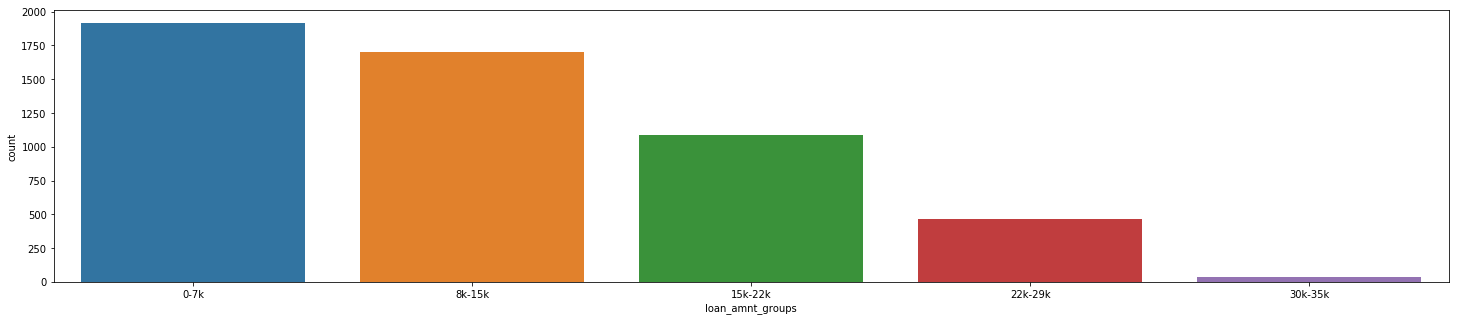

In [399]:
plt.figure(figsize=(25,5))
sns.countplot(x='loan_amnt_groups', data=data[data.loan_status == 'Charged Off'])

### Observation: Customers who have loan amounts between 500 and 15K have not paid off their loan amount

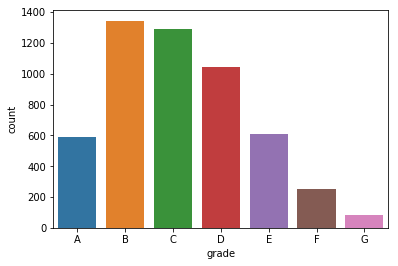

In [411]:
#Lets analyse the impact of grade and sub_grade on the loan status
sns.countplot(x='grade',data=data[data.loan_status=='Charged Off'], order=['A','B','C','D','E','F','G'])

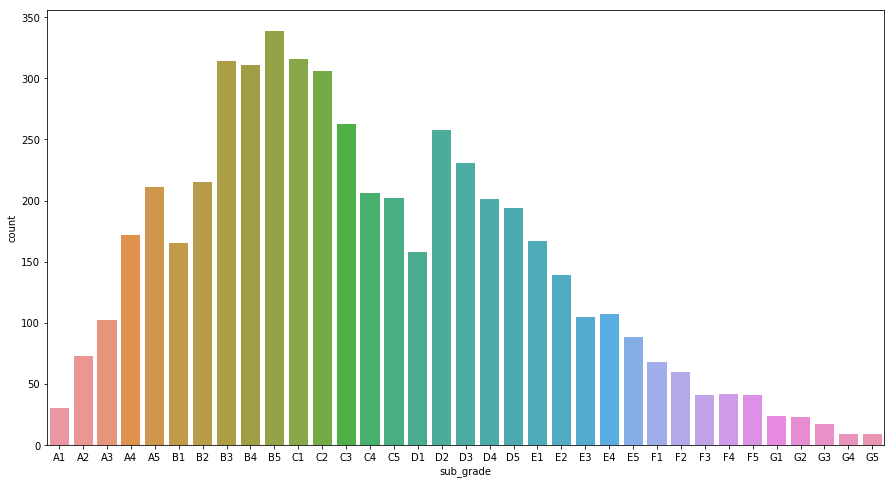

In [379]:
plt.figure(figsize=(15,8))
sns.countplot(x='sub_grade',data=data[data.loan_status=='Charged Off'], order=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])


### Observation: The customers with loan grades B, C and D have not paid the loan amount. Around 1300 customers belonging to B and C loan grades and about 10000 customers belonging to D grade. have not paind the full amount.
### Observation: Specifically B3, B4, B5, C1, C2, D2, D3 sub grades have not paid their loan 

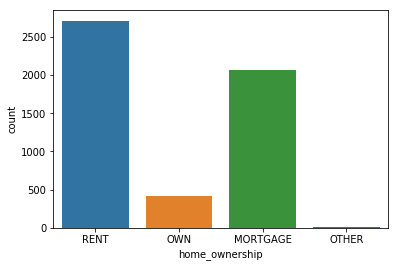

In [381]:
#Lets analyse the impact home_ownership on loan_status
sns.countplot(x='home_ownership', data=data[data['loan_status']=='Charged Off'])

### Observation: Customers who are living in rented apartments and customers who have mortgage on their houses have not paid the loan amount.

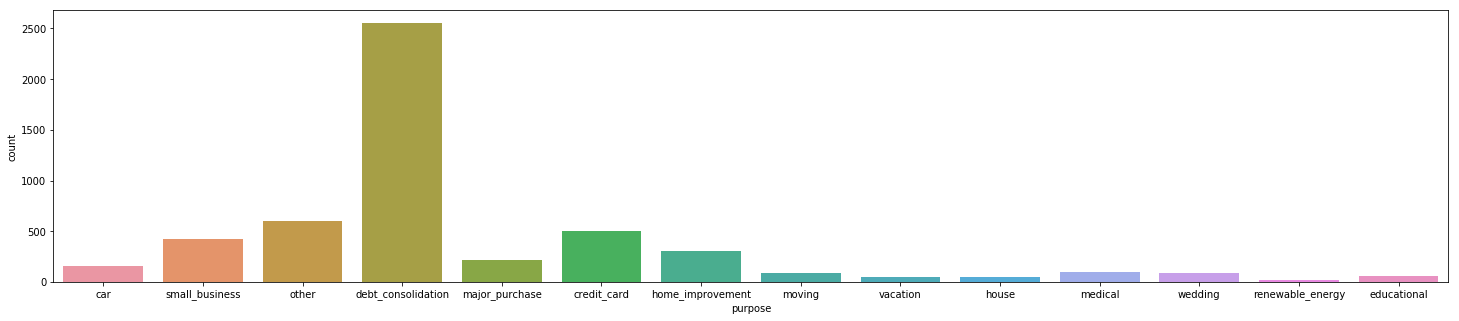

In [384]:
#Lets analyse the impact of purpose on loan_status
plt.figure(figsize=(25,5))
sns.countplot(x='purpose', data=data[data['loan_status']=='Charged Off'])

### Observation: Majority of the customers who fall under defaulters have mostly taken the loan for debt consolidation or to pay off the other loans

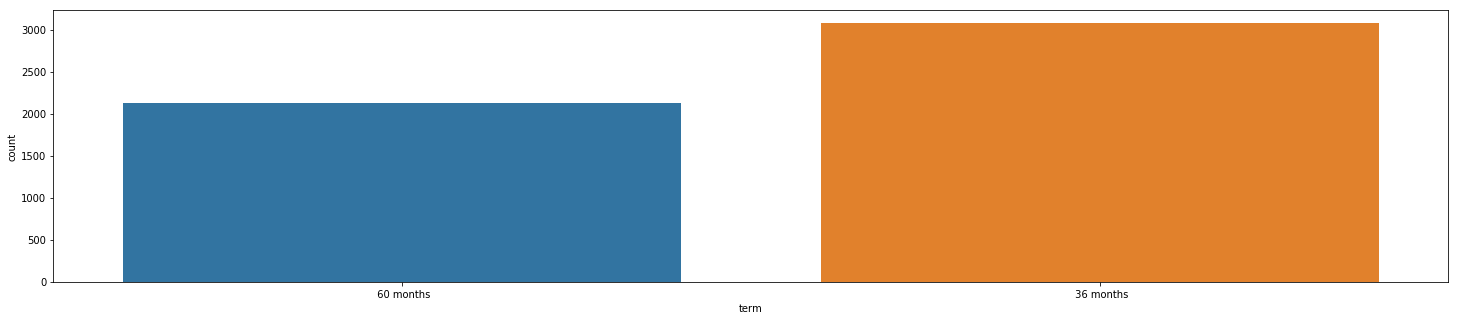

In [386]:
#Lets analyse the impact of term on loan_status
plt.figure(figsize=(25,5))
sns.countplot(x='term', data=data[data['loan_status']=='Charged Off'])

### Observation: Most customers whose loan term is 36 months have not paid their loan amount

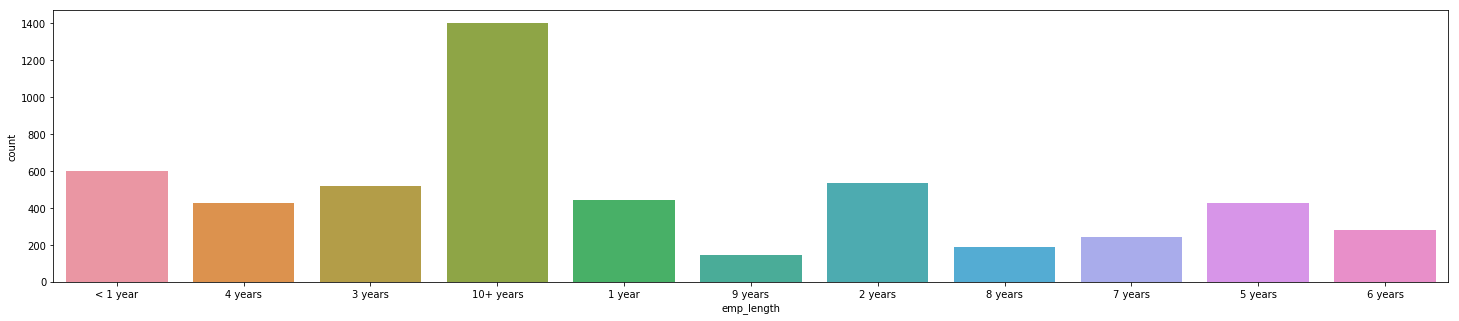

In [395]:
#Lets analyse the impact of emp_length on loan_status
plt.figure(figsize=(25,5))
sns.countplot(x='emp_length', data=data[data['loan_status']=='Charged Off'])

### Observation: Customers who have 10+ years of experience have not paid their loant amount

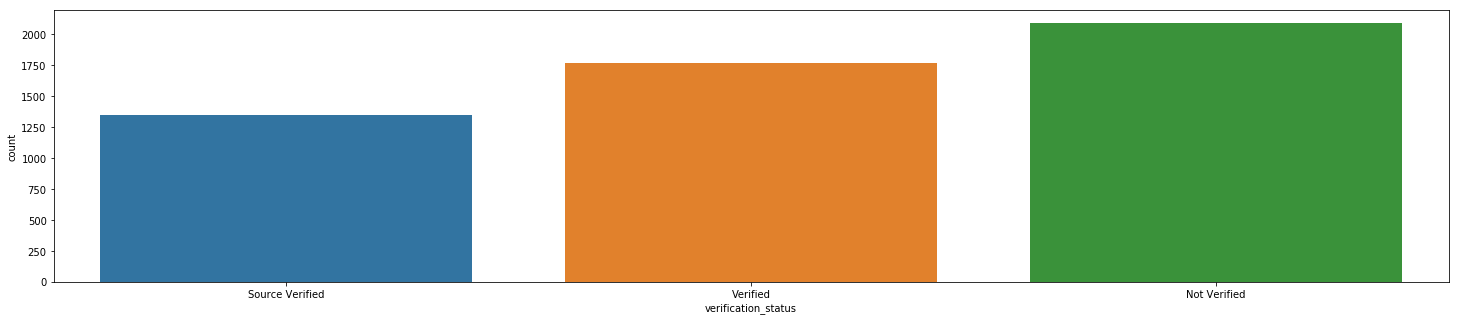

In [387]:
#Lets analyse the impact of verification_status on loan_status
plt.figure(figsize=(25,5))
sns.countplot(x='verification_status', data=data[data['loan_status']=='Charged Off'])

### Observation: Customers whose incomes are not verified are most likely to be charged off

In [393]:
#Lets create buckets for income
data['annual_inc_groups'] = pd.cut(data['annual_inc'], bins=5,precision =0,labels =['3k-30k','31k-60k','61k-90k','91k-120k','120k-140k'])

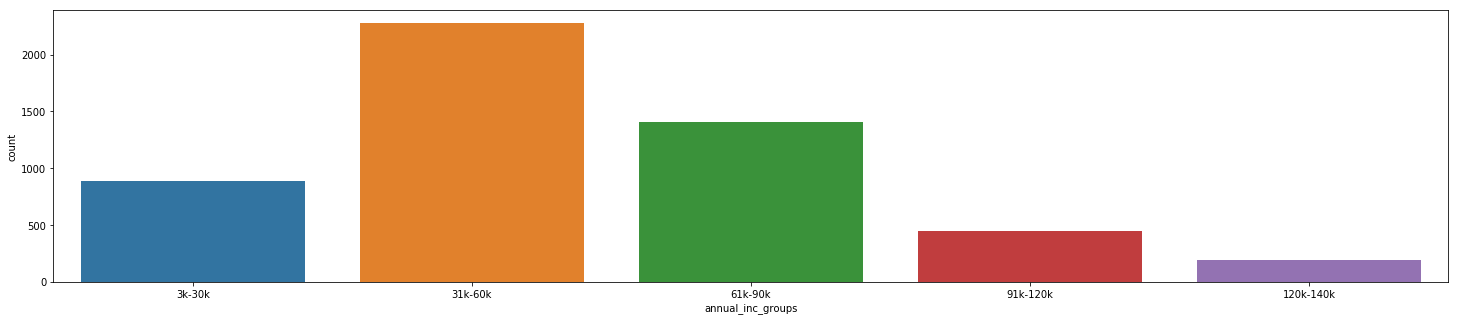

In [394]:
plt.figure(figsize=(25,5))
sns.countplot(x='annual_inc_groups', data=data[data.loan_status == 'Charged Off'])

### Observation: Customers whose incomes ranges between 31000 and 60000 have not paid the loan amount

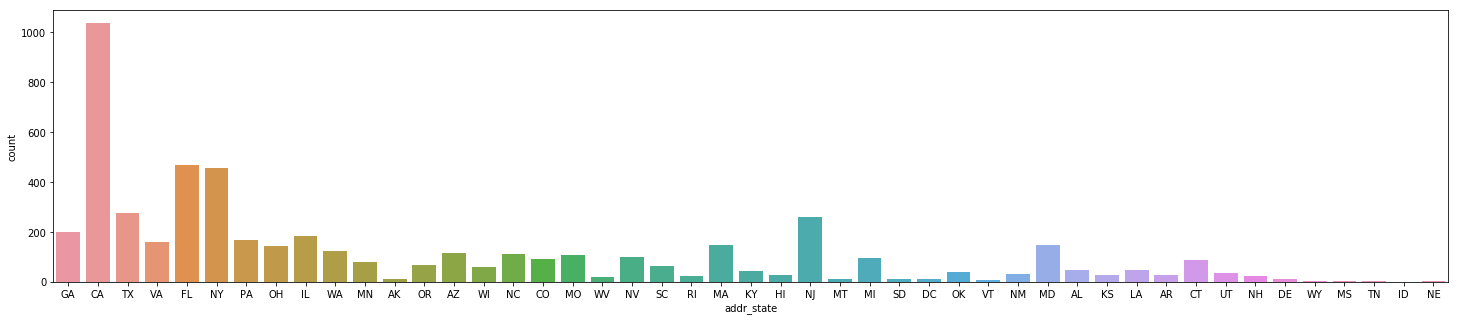

In [403]:
#Lets analyse the implact of state
plt.figure(figsize=(25,5))
sns.countplot(x='addr_state', data=data[data.loan_status == 'Charged Off'])

### Observation: From the above plot we see that most customers who have been charged off are from California

In [406]:
#Lets analyse the impact of loan issued month/year on the loan_status

monthAndYear = data['issue_d'].str.partition("-", True)     
data['month']=monthAndYear[0]                       
data['year']='20' + monthAndYear[2]
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,addr_state,dti,total_acc,annual_inc_groups,loan_amnt_groups,month,year
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Dec-11,Fully Paid,credit_card,AZ,27.65,9,3k-30k,500-7k,Dec,2011
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Dec-11,Charged Off,car,GA,1.00,4,3k-30k,500-7k,Dec,2011
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Dec-11,Fully Paid,small_business,IL,8.72,10,3k-30k,500-7k,Dec,2011
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Dec-11,Fully Paid,other,CA,20.00,37,31k-60k,8k-15k,Dec,2011
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,Dec-11,Fully Paid,wedding,AZ,11.20,12,31k-60k,500-7k,Dec,2011


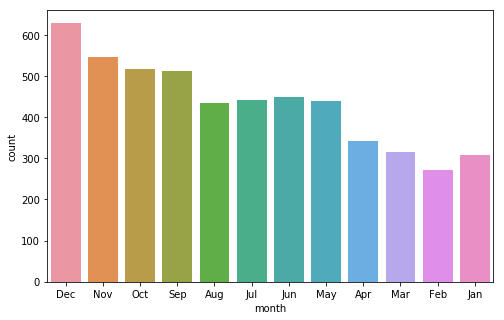

In [409]:
#Lets analyse the implact of month
plt.figure(figsize=(8,5))
sns.countplot(x='month', data=data[data.loan_status == 'Charged Off'])

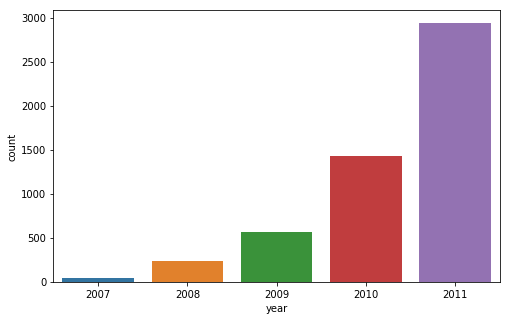

In [410]:
#Lets analyse the implact of year
plt.figure(figsize=(8,5))
sns.countplot(x='year', data=data[data.loan_status == 'Charged Off'])

In [412]:
#Lets analyse the impcat of interest rates on loan status
#Lets convert interest rate to numeric
data['int_rate'] = pd.to_numeric(data.int_rate.apply(lambda x : x.split('%')[0]))
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,addr_state,dti,total_acc,annual_inc_groups,loan_amnt_groups,month,year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,Dec-11,Fully Paid,credit_card,AZ,27.65,9,3k-30k,500-7k,Dec,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,Dec-11,Charged Off,car,GA,1.00,4,3k-30k,500-7k,Dec,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,Dec-11,Fully Paid,small_business,IL,8.72,10,3k-30k,500-7k,Dec,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,Dec-11,Fully Paid,other,CA,20.00,37,31k-60k,8k-15k,Dec,2011
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,Dec-11,Fully Paid,wedding,AZ,11.20,12,31k-60k,500-7k,Dec,2011


In [413]:
data.int_rate.min()

5.42

In [414]:
data.int_rate.max()

24.4

In [415]:
#Lets bucket the interest rates as below 
data['int_rate_groups'] = pd.cut(data['int_rate'], bins=4,precision =0,labels=['5%-10%','11%-15%','16%-20%','21%-25%'])

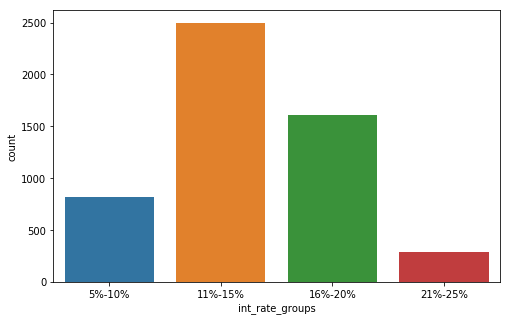

In [416]:
#Lets analyse the implact of interest rates on the loan status
plt.figure(figsize=(8,5))
sns.countplot(x='int_rate_groups', data=data[data.loan_status == 'Charged Off'])

### Observation: From the above two plots we see that the customers whose loan was issued in the month of December and specifically in the 2011


### Obervation and Recommendations:
#### Customers are highly likely to be charged off when

* The customers home_ownership is RENT or MORTGAGE
* The customers take one loan to pay off many other loans(i.e. when the purpose is debt_consolidation)
* The customers annual income fall in the range 31K-60K. Also customers whose annual income fall in the range 61K-90K are also likely to be charged off
* The customers with 10+ years of experience are most likely to not pay the loan amount
* The customers who have loan amount in the range of 500 to 15000
* The customers whose incomes are not LC verified
* The customers who have the loan term of 36 months
* The customers whose LC assigned loan grades are B, C and D with B5 being the most likely to be charged off 
* The customers are from California
* The customers whose interest rates are in the range 11%-15%